In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import star_utils
from astropy import stats

In [52]:
img_fits = star_utils.load_hi_res()   #load star images
data = star_utils.load_stars()     #load star database

In [53]:
clipped_data = stats.sigma_clip(img_fits['mx3'])  #get stats on image
mid = np.median(clipped_data)
std = np.std(clipped_data - mid)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


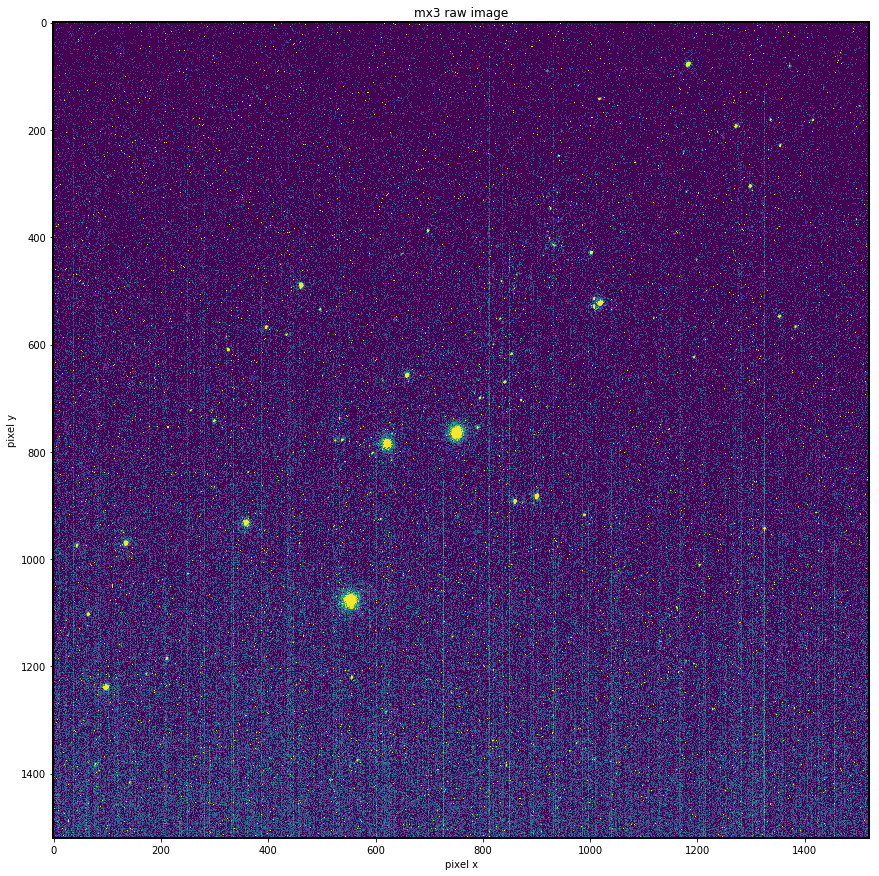

In [90]:
#Plot the raw 'px3' image
img = 'mx3'  #select which image to plot
fig = plt.figure()
fig.set_tight_layout(False)
matplotlib.rcParams['figure.figsize'] = (15, 15)
ax = fig.add_subplot(111)
ax.imshow(img_fits[img],vmin=mid,vmax=mid+5*std)
ax.grid(False)
plt.xlabel('pixel x')
plt.ylabel('pixel y')
plt.title(img+' raw image')
plt.show()

In [78]:
col_list = ['x_img_'+img,
            'y_img_'+img]
stars = star_utils.img_stars(data,img,col_list)
stars[:11]  #show centroid pixel location for first ten stars

,x_img_mx3,y_img_mx3
starname,,
alpha Aps,1146.45,1230.09
alpha Cir,689.88,1230.40
alpha Lup,99.08,1238.50
alpha Mus,900.66,884.38
alpha Vol,1361.25,432.33
alpha1 centaurus,556.54,1221.20
alpha1 crucis,752.18,764.91
beta Aps,1165.42,1439.21
beta Car,1353.03,548.21


In [79]:
from astropy.stats import sigma_clipped_stats 
mean, median, std = sigma_clipped_stats(img_fits[img], sigma=3.0, iters=5)    
print((mean, median, std)) 


(77.049779227718872, 77.0, 1.272418575986672)


In [82]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)    
sources = daofind(img_fits[img] - median)    
print(sources)
centroids = pd.DataFrame([sources['xcentroid','ycentroid']])

 id   xcentroid     ycentroid   ... peak      flux            mag        
--- ------------- ------------- ... ---- ------------- ------------------
  1 473.507543239 7.12667238688 ...  7.0 1.03252782322   -0.0347544082274
  2 1.83421052632 11.0616506596 ... 22.0 2.74613153462     -1.09680333825
  3 313.972455388 23.5646216284 ...  9.0 1.35177429362    -0.327260458271
  4 1183.09334005 78.0195789877 ... 87.0 8.38096020385     -2.30823444614
  5 853.908777325  79.272606077 ...  7.0  1.0395281403   -0.0420906257293
  6 1371.73131704 80.8821447126 ... 11.0 1.40982208898    -0.372910776939
  7 1054.96188188 99.0874412244 ... 10.0  1.3673450861    -0.339695335569
  8  588.88576123 142.987463958 ... 10.0 1.25524813468    -0.246823961698
  9 1017.57439195 142.633210944 ... 12.0  1.4491167033    -0.402758405978
 10 395.285203872 152.770293571 ...  7.0 1.02107403767    -0.022643084369
...           ...           ... ...  ...           ...                ...
190 771.864214549 1447.19757866 ...  7

C:\Anaconda3\lib\site-packages\astropy\visualization\stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
C:\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


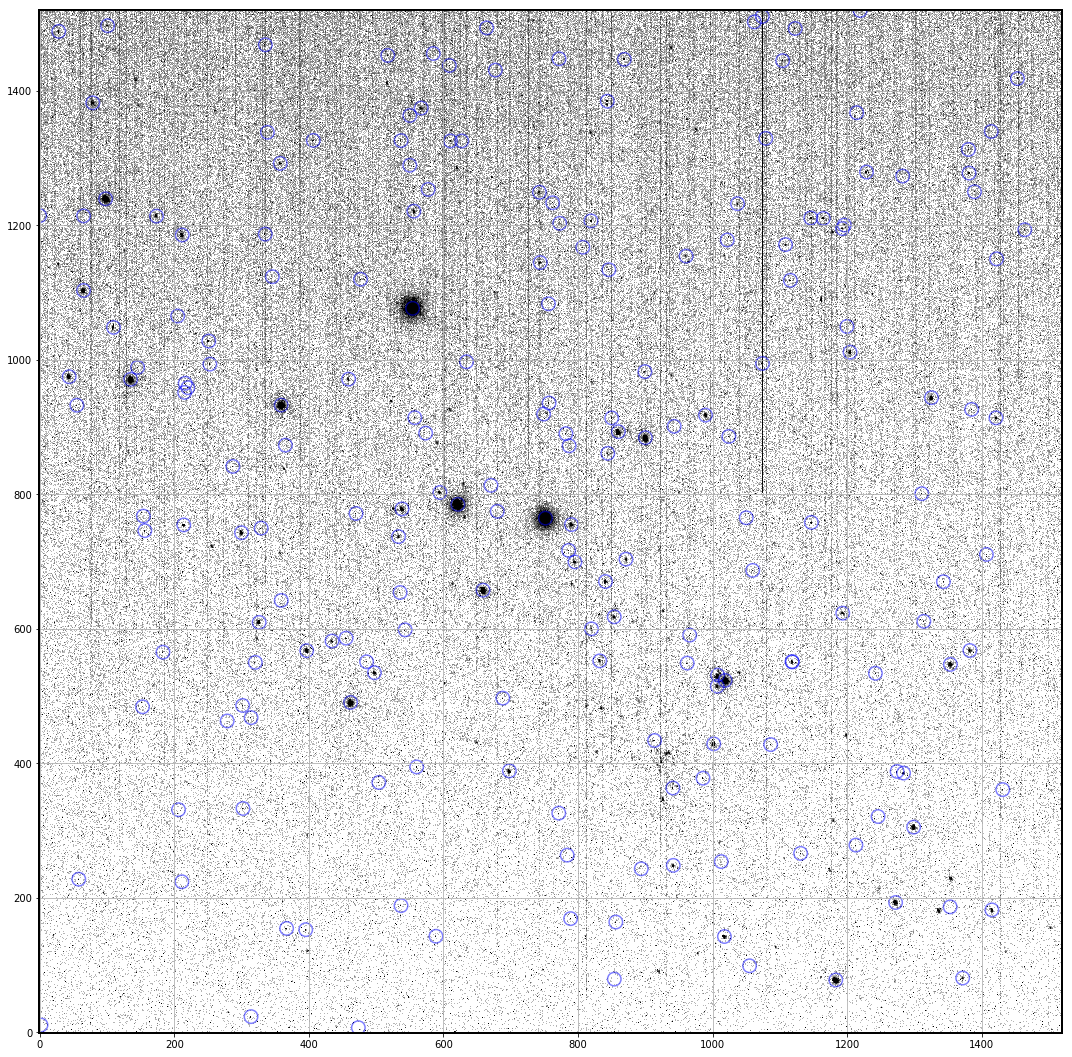

In [89]:
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=10.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(img_fits[img], cmap='Greys', origin='lower', norm=norm,vmin=mid,vmax=mid+5*std)
apertures.plot(color='blue', lw=1.5, alpha=0.5)